In [8]:
import pandas as pd
import numpy as np
import os

# Drawing
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
from matplotlib.cm import get_cmap
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
file = "data/Town_Hall_Rich_List_2023.xlsx"
data_df = pd.read_excel(file).fillna(0)

In [10]:
data_df = data_df \
    .groupby(['Council'], sort=False, as_index=False) \
    .agg(
        count_people=("Council", "count"),
        sum_tc=("Total", "sum"),
        mean_tc=("Total", "mean"),
        sd_tc=("Total", np.std)
).fillna(0)

In [11]:
data_df.sort_values(by="mean_tc", ascending=False)

,Council,count_people,sum_tc,mean_tc,sd_tc
341,Wyre Forest,4,893252.0,223313.000000,72184.329925
124,Guildford,5,1095759.0,219151.800000,217358.040324
144,High Peak,1,213309.0,213309.000000,0.000000
14,Barnet,8,1697635.0,212204.375000,29611.595185
211,North Lanarkshire,8,1577275.0,197159.375000,141318.011074
...,...,...,...,...,...
273,South Somerset,9,960000.0,106666.666667,5055.937104
156,Isles of Scilly,1,104954.0,104954.000000,0.000000
102,Eden,1,102527.0,102527.000000,0.000000
323,West Devon,1,101600.0,101600.000000,0.000000


## Map

[]

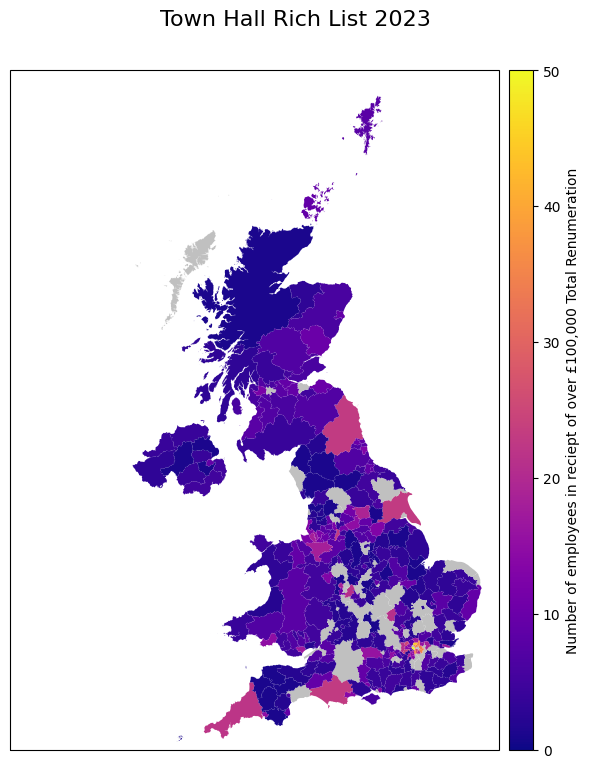

In [18]:
fig = plt.figure(figsize=(6,8), dpi=100)
projectionPARAM = ccrs.TransverseMercator(central_longitude=-2.0, central_latitude=49.0, false_easting=400000.0, false_northing=-100000.0, scale_factor=0.9996012717, approx=False)
ax = fig.add_subplot(1, 1, 1, projection=projectionPARAM)
ax.set_extent([-10.75, 2, 49.75, 61])

council_dict = (data_df[['Council', 'count_people']].set_index('Council').T.to_dict('records'))[0]

# Downloaded from: https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2022-uk-bfe-v3-1/about
area_file = os.path.join(os.getcwd(), 'shapefiles', 'Local_Authority_Districts_May_2022_UK_BFE_V3_2022', 'LAD_MAY_2022_UK_BFE_V3.shp')
council_divisions = shapereader.Reader(area_file)

norm = colors.Normalize(vmin=0., vmax=max(council_dict.values()))
cmap = matplotlib.colormaps['plasma'] # PuBu

for record in council_divisions.records():
    code = record.attributes['LAD22NM']
    council_entry = council_dict.get(code, -1)
    if council_entry == -1:
        council_color = "Silver"
    else:
        council_color = cmap(council_entry/max(council_dict.values()))
    ax.add_geometries(
            [record.geometry],
            #facecolor=numpy.random.rand(3,),
            facecolor=council_color,
            linewidth=0,
            crs=projectionPARAM,
    )

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)

sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cb = plt.colorbar(sm, cax=ax_cb)
cb.set_label("Number of employees in reciept of over £100,000 Total Renumeration")

fig.suptitle("Town Hall Rich List 2023", fontsize=16)

plt.tight_layout()
plt.savefig("results/thrl_2023.png")
plt.plot()